In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
brd=pd.read_csv(r"C:\Users\nenba\Downloads\brands.csv")

In [64]:
brd.head()

,ro_brand_id,brand_name,parent_ro_brand_id,ssic_code,top_category,sub_category,stock_symbol,stock_exchange,id,map_text,created_at
0,RO_BRAND_125,Starbucks,NaN,125.0,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,NaN,NaN,NaN,"{starbucks,starbuck}",2020-06-05 10:59:37.922689
1,RO_BRAND_95,Mcdonald's,NaN,95.0,Restaurants and Other Eating Places,Limited-Service Restaurants,NaN,NaN,NaN,"{mcdonalds,mcdonald's,mcdonald}",2020-06-05 10:59:37.922689
2,RO_BRAND_37,Prime Supermarket,NaN,37.0,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN,NaN,"{primesupermarket,""prime supermarket""}",2020-06-05 10:59:37.922689
3,RO_BRAND_31,Song Fish Supermarket,NaN,31.0,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN,NaN,"{""song fish"",songfish}",2020-06-05 10:59:37.922689
4,RO_BRAND_30,U Stars Supermarket,NaN,30.0,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN,NaN,"{""u stars"",ustars,ustar,""u star"",""u stars supe...",2020-06-05 10:59:37.922689


In [65]:
brd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ro_brand_id         417 non-null    object 
 1   brand_name          417 non-null    object 
 2   parent_ro_brand_id  0 non-null      float64
 3   ssic_code           165 non-null    float64
 4   top_category        416 non-null    object 
 5   sub_category        362 non-null    object 
 6   stock_symbol        0 non-null      float64
 7   stock_exchange      0 non-null      float64
 8   id                  18 non-null     float64
 9   map_text            131 non-null    object 
 10  created_at          417 non-null    object 
dtypes: float64(5), object(6)
memory usage: 36.0+ KB


In [66]:
brd.nunique()

ro_brand_id           417
brand_name            414
parent_ro_brand_id      0
ssic_code             148
top_category           14
sub_category           16
stock_symbol            0
stock_exchange          0
id                      1
map_text              131
created_at              1
dtype: int64

In [67]:
len(brd)

417

In [68]:
brd2 = brd[[column for column in brd if brd[column].count() / len(brd) >= 0.3]]
del brd['ro_brand_id']
print("List of dropped columns:", end=" ")
for i in brd.columns:
    if i not in brd2.columns:
        print(i, end=", ")
print('\n')
brd = brd2

List of dropped columns: parent_ro_brand_id, stock_symbol, stock_exchange, id, 



count    165.000000
mean      66.260606
std       46.754274
min        0.000000
25%       24.000000
50%       65.000000
75%      107.000000
max      148.000000
Name: ssic_code, dtype: float64


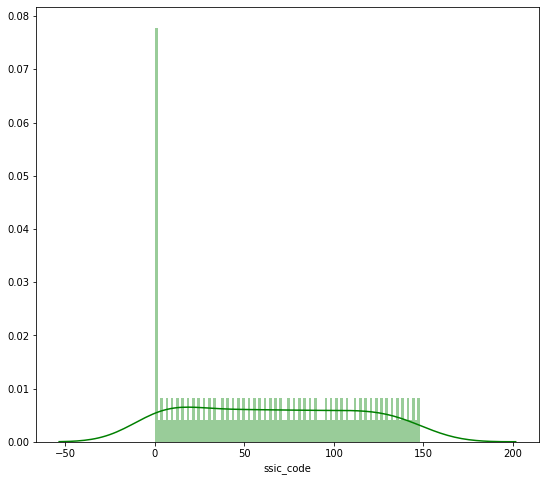

In [70]:
print(brd["ssic_code"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(brd["ssic_code"], color='g', bins=100, hist_kws={'alpha': 0.4});

In [71]:
list(set(brd.dtypes.tolist()))


[dtype('float64'), dtype('O')]

In [72]:
brd_num = brd.select_dtypes(include = ['float64'])
brd_num.head()

,ssic_code
0,125.0
1,95.0
2,37.0
3,31.0
4,30.0


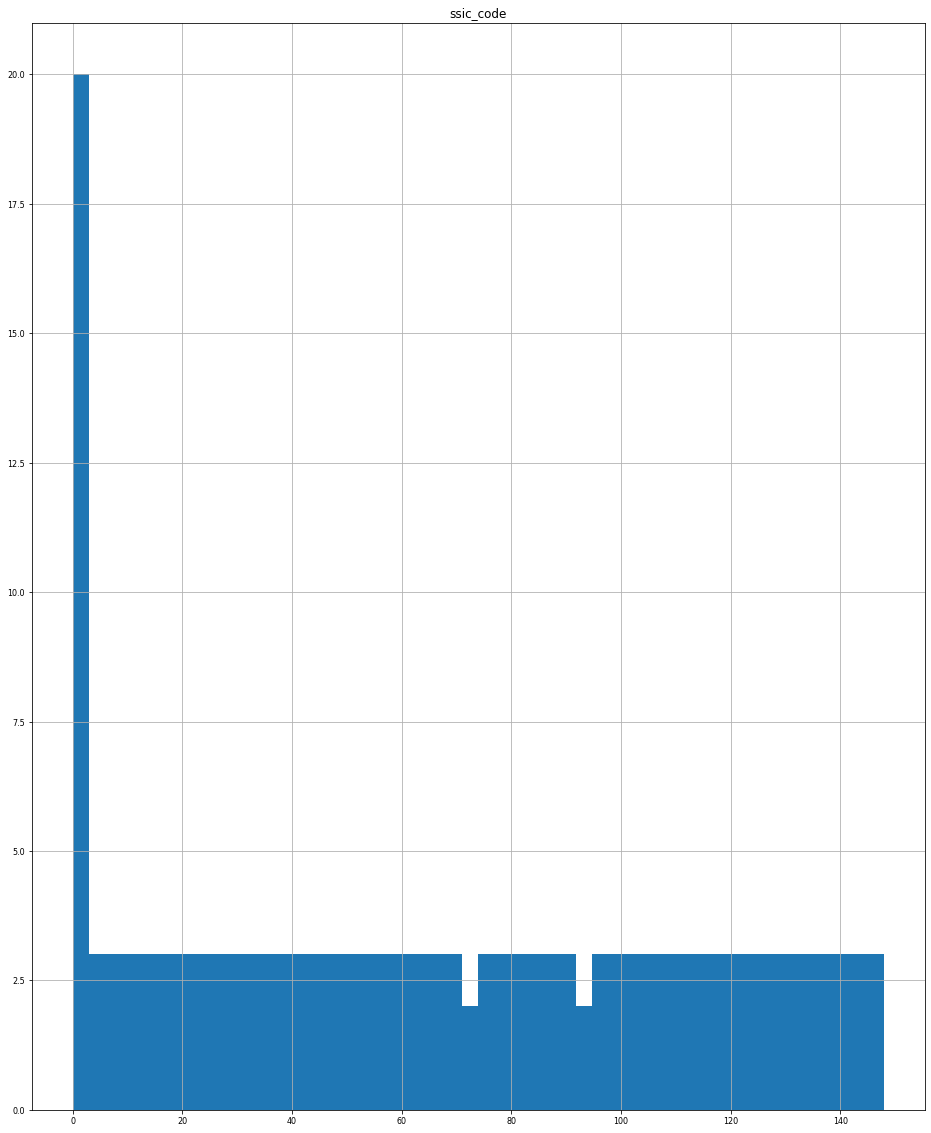

In [74]:
brd_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [79]:
brd_num.columns

Index(['ssic_code'], dtype='object')

In [81]:
brd.columns

Index(['ro_brand_id', 'brand_name', 'ssic_code', 'top_category',
       'sub_category', 'map_text', 'created_at'],
      dtype='object')

In [87]:
categorical_features =['ro_brand_id', 'brand_name', 'top_category',
       'sub_category', 'map_text','ssic_code', 'created_at']
brd_categ = brd[categorical_features]
brd_categ.head()

,ro_brand_id,brand_name,top_category,sub_category,map_text,ssic_code,created_at
0,RO_BRAND_125,Starbucks,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,"{starbucks,starbuck}",125.0,2020-06-05 10:59:37.922689
1,RO_BRAND_95,Mcdonald's,Restaurants and Other Eating Places,Limited-Service Restaurants,"{mcdonalds,mcdonald's,mcdonald}",95.0,2020-06-05 10:59:37.922689
2,RO_BRAND_37,Prime Supermarket,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,"{primesupermarket,""prime supermarket""}",37.0,2020-06-05 10:59:37.922689
3,RO_BRAND_31,Song Fish Supermarket,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,"{""song fish"",songfish}",31.0,2020-06-05 10:59:37.922689
4,RO_BRAND_30,U Stars Supermarket,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,"{""u stars"",ustars,ustar,""u star"",""u stars supe...",30.0,2020-06-05 10:59:37.922689


In [88]:
brd_not_num = brd_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(brd_not_num.columns), brd_not_num.columns.tolist()))

There is 6 non numerical features including:
['ro_brand_id', 'brand_name', 'top_category', 'sub_category', 'map_text', 'created_at']


In [84]:
brd_categ

,ro_brand_id,brand_name,top_category,sub_category,map_text,created_at
0,RO_BRAND_125,Starbucks,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,"{starbucks,starbuck}",2020-06-05 10:59:37.922689
1,RO_BRAND_95,Mcdonald's,Restaurants and Other Eating Places,Limited-Service Restaurants,"{mcdonalds,mcdonald's,mcdonald}",2020-06-05 10:59:37.922689
2,RO_BRAND_37,Prime Supermarket,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,"{primesupermarket,""prime supermarket""}",2020-06-05 10:59:37.922689
3,RO_BRAND_31,Song Fish Supermarket,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,"{""song fish"",songfish}",2020-06-05 10:59:37.922689
4,RO_BRAND_30,U Stars Supermarket,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,"{""u stars"",ustars,ustar,""u star"",""u stars supe...",2020-06-05 10:59:37.922689
...,...,...,...,...,...,...
412,RO_BRAND_374,Az Optics,Health and Personal Care Stores,Optical Goods Stores,NaN,2020-06-05 10:59:37.922689
413,RO_BRAND_375,Blu,"Warehousing, Storage, Logistics","Warehousing, Storage, Logistics",NaN,2020-06-05 10:59:37.922689
414,RO_BRAND_327,Vans,Clothing Stores,NaN,{vans},2020-06-05 10:59:37.922689
415,RO_BRAND_320,Axs,Activities Related to Credit Intermediation,Payment Devices,{axs},2020-06-05 10:59:37.922689


In [92]:
fig, axes = plt.subplots(round(len(brd_not_num.columns) / 3), 3, figsize=(100,100))

for i, ax in enumerate(fig.axes):
    if i < len(brd_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=brd_not_num.columns[i], alpha=0.7, data=brd_not_num, ax=ax)
fig.canvas.draw()
fig.tight_layout()